<a href="https://colab.research.google.com/github/Belal-AI/CNN_Model_Transfer_learning/blob/main/regularizations_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("airlinedelaycauses_DelayedFlights.csv")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001831 entries, 0 to 1001830
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1001831 non-null  int64  
 1   Year               1001831 non-null  int64  
 2   Month              1001831 non-null  int64  
 3   DayofMonth         1001831 non-null  int64  
 4   DayOfWeek          1001831 non-null  int64  
 5   DepTime            1001831 non-null  float64
 6   CRSDepTime         1001831 non-null  int64  
 7   ArrTime            998219 non-null   float64
 8   CRSArrTime         1001831 non-null  int64  
 9   UniqueCarrier      1001831 non-null  object 
 10  FlightNum          1001831 non-null  int64  
 11  TailNum            1001827 non-null  object 
 12  ActualElapsedTime  998219 non-null   float64
 13  CRSElapsedTime     1001703 non-null  float64
 14  AirTime            998219 non-null   float64
 15  ArrDelay           998219 non-nu

In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

In [ ]:
data["LateAircraftDelay"].hist()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
data=pd.get_dummies(data=data)

In [ ]:
data=scaler.fit_transform(X=data.iloc[:,:-1],y=data.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(data[:,:-1],data[:,-1])

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.metrics import  mean_squared_error

In [ ]:
svr=make_pipeline(StandardScaler(),SVR(epsilon=.3,C=7,degree=5))

In [ ]:
svr.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=7, degree=5, epsilon=0.3))])

In [ ]:
mean_squared_error(test_y,svr.predict(test_X))

0.8699636010263692

In [ ]:
from sklearn.linear_model import Ridge

#Very importan noe about it 
- here if we puted PolynomialFeatures with any degree will got Ram error the limit of the rame excexceded caues the PolynomialFeatures derive new features from the old features so if we have 30 feature each we will got 90 feature 

In [ ]:
model=make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge())

In [ ]:
model.fit(train_X,train_y)

In [ ]:
 from sklearn.datasets import fetch_openml

In [ ]:
minst=fetch_openml('mnist_784',version=1)
mnist_784

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [49]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()


import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



housing = load_housing_data()
data=housing


In [50]:
data=load_housing_data(housing_path=HOUSING_PATH)

In [51]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [52]:
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()

In [53]:
data['ocean_proximity']=encod.fit_transform(data['ocean_proximity'])
y=data['ocean_proximity']

In [54]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [55]:
col=data.columns

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

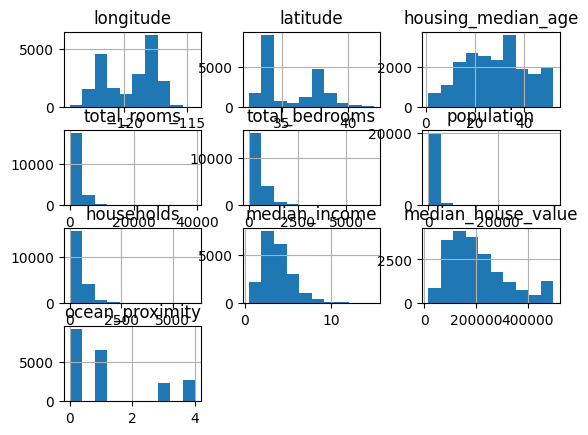

In [57]:
data.hist()

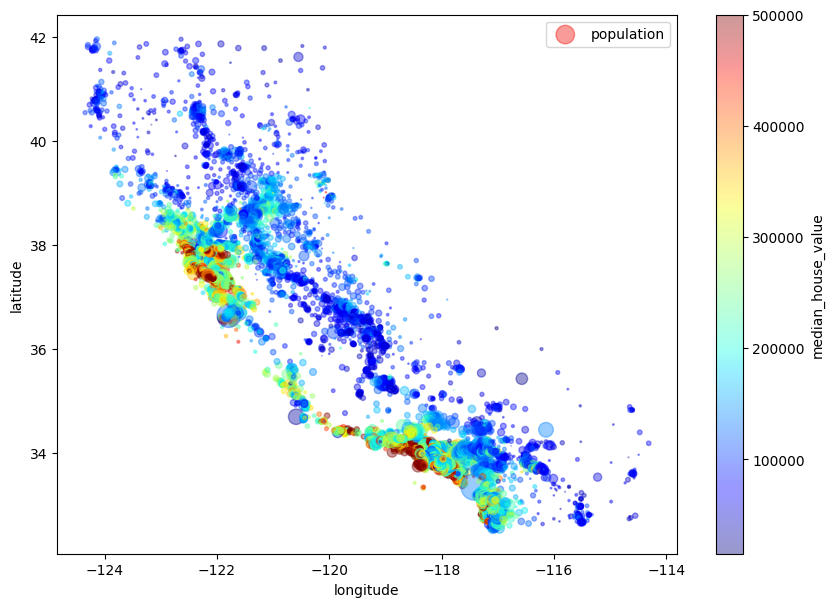

In [58]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=data["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [60]:
pipline=make_pipeline(StandardScaler(),SimpleImputer(strategy="median"))

In [61]:
data=pipline.fit_transform(data.iloc[:,:-1])


In [62]:
col[:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [63]:
data=pd.DataFrame(data=data,columns=col[:-1])

In [64]:
data['target']=y

In [65]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,3
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,3
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,3
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,3
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,3
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,1
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,1
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,1
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,1


In [66]:
startas_model=StratifiedShuffleSplit(n_splits=5)
for train_idx ,test_idx in startas_model.split(data.iloc[:,:-1],data.iloc[:,-1]):
  trainx=data.iloc[train_idx,:-1]
  trainy=data.iloc[train_idx,-1]
  testx=data.iloc[test_idx,:-1]
  testy=data.iloc[test_idx,-1]

In [67]:
trainy

2933     1
7888     0
5771     0
10596    0
2192     1
        ..
7964     0
18305    3
8168     4
8542     0
7848     0
Name: target, Length: 18576, dtype: int64

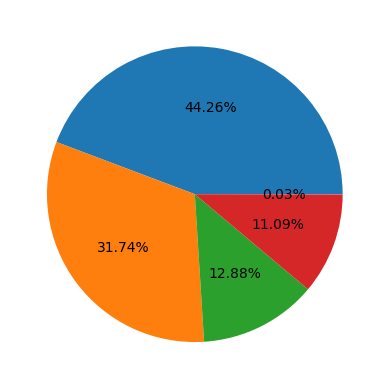

In [68]:
plt.pie(trainy.value_counts(),autopct = '%1.2f%%')
plt.show()

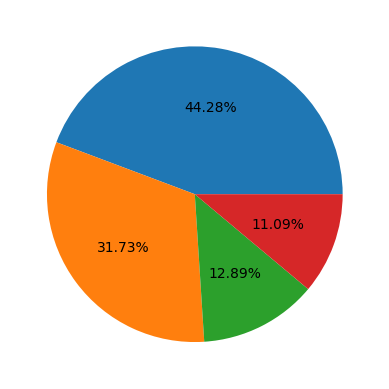

In [69]:
plt.pie(testy.value_counts(),autopct = '%1.2f%%')
plt.show()

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [89]:
from sklearn.model_selection import cross_val_score

In [96]:
scores=cross_val_score(tree_reg,data.iloc[:,:-1],data.iloc[:,-1],scoring="neg_mean_squared_error",cv=10)

In [98]:
np.sqrt(-scores)

array([0.65370145, 0.46641051, 0.47413732, 0.793017  , 1.26176633,
       2.206733  , 0.20881727, 1.55783217, 1.38810702, 1.49433685])

- you can create train_test_split fnction that create random test data for each run 
but this very wrong cause we could be avoid it we must keep our model away from see test data that seen before 

-so..  you could compute a hash of each instance’s identifier and put that instance in the test set if the
hash is lower than or equal to 20% of the maximum hash value. This ensures that the
test set will remain consistent across multiple runs, even if you refresh the dataset.
The new test set will contain 20% of the new instances, but it will not contain any
instance that was previously in the training se

If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset and that no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:

In [ ]:
from zlib import crc32

In [ ]:
def hashed(id,test_ratio):
  return crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32

In [ ]:
def train_Test_split_min(id,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_:hashed(id,test_ratio))
  return data[~ in_test_set] , data[in_test_set]

the id coloum can be indeses of the data poitn or select any satbel feature 

- the train test split technique its okay tou use the randomly techniques if your data is very big otherwise you should to use the stratifed splitiing technique 
- its can split the data and the test data will discripe the populaion and not biasd to a data  

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
att=['HouseAge','AveRooms','AveOccup','Population']

array([[<Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>],
       [<Axes: xlabel='HouseAge', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>,
        <Axes: xlabel='AveOccup', ylabel='AveRooms'>,
        <Axes: xlabel='Population', ylabel='AveRooms'>],
       [<Axes: xlabel='HouseAge', ylabel='AveOccup'>,
        <Axes: xlabel='AveRooms', ylabel='AveOccup'>,
        <Axes: xlabel='AveOccup', ylabel='AveOccup'>,
        <Axes: xlabel='Population', ylabel='AveOccup'>],
       [<Axes: xlabel='HouseAge', ylabel='Population'>,
        <Axes: xlabel='AveRooms', ylabel='Population'>,
        <Axes: xlabel='AveOccup', ylabel='Population'>,
        <Axes: xlabel='Population', ylabel='Population'>]], dtype=object)

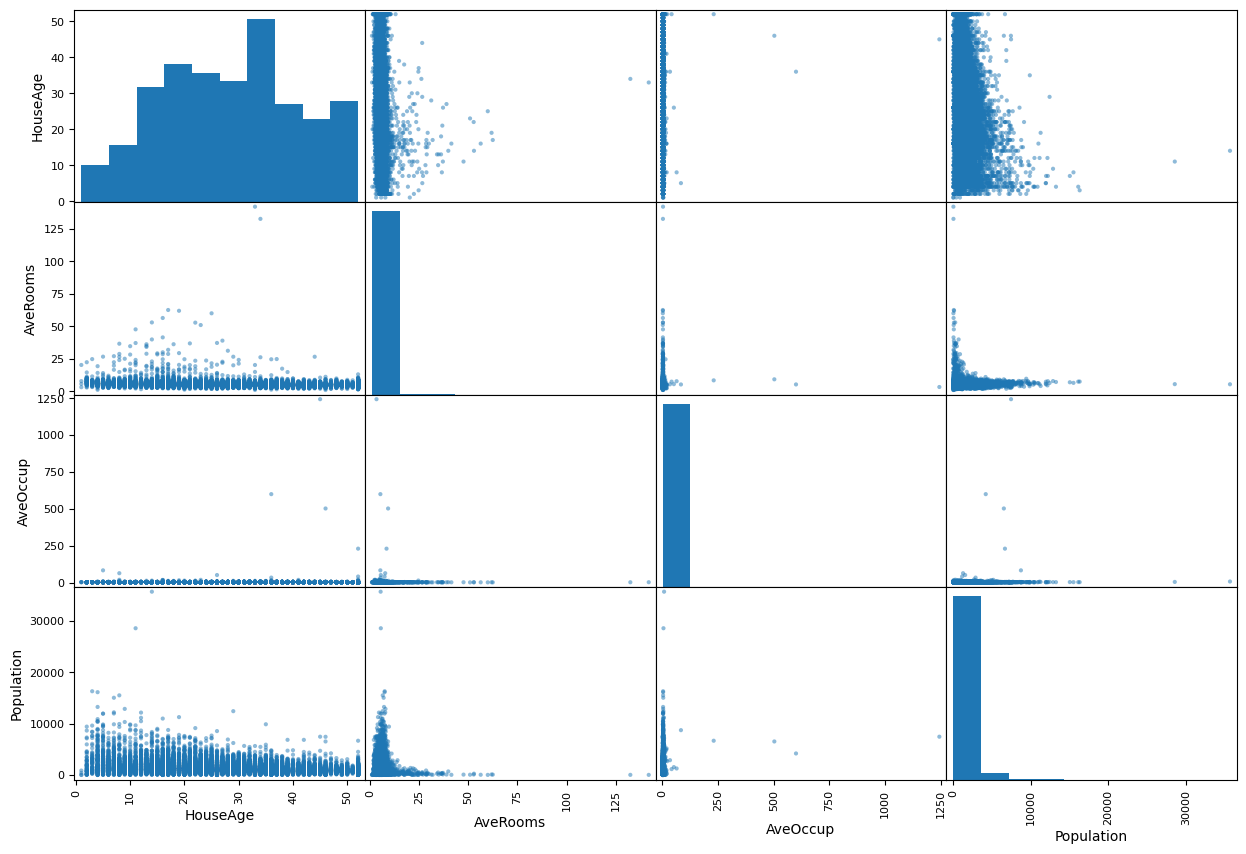

In [ ]:
scatter_matrix(data[att],figsize=(15,10))